In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('seaborn-poster')
%matplotlib inline
from scipy.interpolate import interp1d
from scipy import stats

<ipython-input-31-d9d78acb0340>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use ('seaborn-poster')


In [ ]:
# assign value
y = [1981,1983,1985,1987,1989,1991,1993,1995,1997,1999]
x = [14.1999,14.2411,14.0342,14.2696,14.197,14.3055,14.1853,14.3577,14.4187,14.3438]
y_interp = [1982,1984,1986,1988,1990,1992,1994,1996,1998]
x_interp = np.interp(y_interp, x, y)

# linear interpolation
linear_interp = np.interp(y_interp, y, x)

# cubic interpolation
cubic_interp_func = interp1d(y, x, kind='cubic')
cubic_interp = cubic_interp_func(y_interp)

# quadratic interpolation
coefficients = np.polyfit(y, x, 2)
quadratic_interp = np.polyval(coefficients, y_interp)

# least-squares regression
slope, intercept, _, _, _ = stats.linregress(y, x)
regression_result = slope * x_interp + intercept

# Calculate the differences
linear_interp_diff = linear_interp - regression_result
cubic_interp_diff = cubic_interp - regression_result
quadratic_interp_diff = quadratic_interp - regression_result

# results
print(f"Linear Interpolation Result: {linear_interp}")
print(f"Cubic Interpolation Result: {cubic_interp}")
print(f"Quadratic Interpolation Result: {quadratic_interp}")
print(f"Regression Result: {regression_result}")
print(f"Difference (Linear Interpolation - Regression): {linear_interp_diff}")
print(f"Difference (Cubic Interpolation - Regression): {cubic_interp_diff}")
print(f"Difference (Quadratic Interpolation - Regression): {quadratic_interp_diff}")

Linear Interpolation Result: [14.2205  14.13765 14.1519  14.2333  14.25125 14.2454  14.2715  14.3882
 14.38125]
Cubic Interpolation Result: [14.32581945 14.09435555 14.14693336 14.24609853 14.25261004 14.24501133
 14.24773214 14.41571012 14.38771488]
Quadratic Interpolation Result: [14.181965   14.18466136 14.19353348 14.20858136 14.229805   14.25720439
 14.29077955 14.33053045 14.37645712]
Regression Result: [14.36468182 14.36468182 14.36468182 14.36468182 14.36468182 14.36468182
 14.36468182 14.36468182 14.36468182]
Difference (Linear Interpolation - Regression): [-0.14418182 -0.22703182 -0.21278182 -0.13138182 -0.11343182 -0.11928182
 -0.09318182  0.02351818  0.01656818]
Difference (Cubic Interpolation - Regression): [-0.03886237 -0.27032627 -0.21774846 -0.11858329 -0.11207178 -0.11967049
 -0.11694968  0.0510283   0.02303306]
Difference (Quadratic Interpolation - Regression): [-0.18271682 -0.18002045 -0.17114833 -0.15610045 -0.13487682 -0.10747742
 -0.07390227 -0.03415136  0.0117753

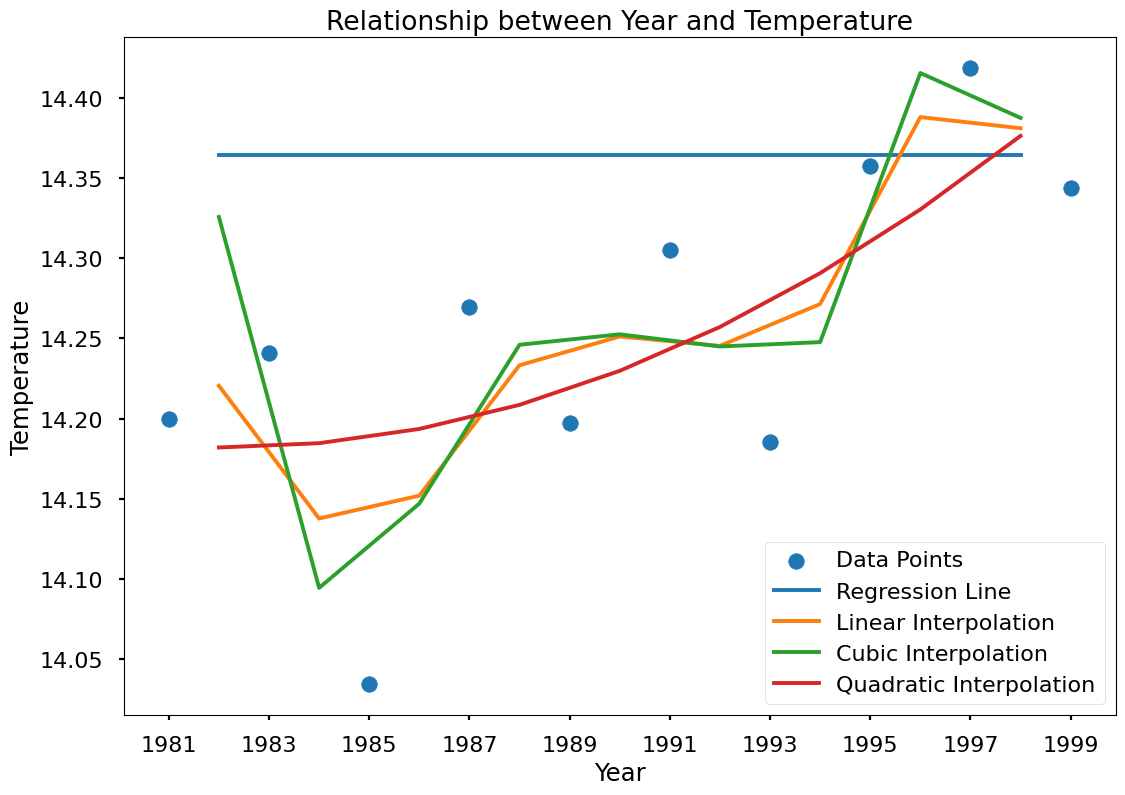

In [ ]:
# plot the data points
plt.scatter(y, x, label='Data Points')

# Plot the regression line
plt.plot(y_interp, regression_result, label='Regression Line')

# Plot the interpolation results
plt.plot(y_interp, linear_interp, label='Linear Interpolation')
plt.plot(y_interp, cubic_interp, label='Cubic Interpolation')
plt.plot(y_interp, quadratic_interp, label='Quadratic Interpolation')

# Set plot to show
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Relationship between Year and Temperature')
plt.xticks(y)
plt.legend()
plt.show()